# WebScrapping

Crawling would be essentially what Google, Yahoo, MSN, etc. do, looking for ANY information. Scraping is generally targeted at certain websites, for specfic data, e.g. for price comparison, so are coded quite differently [(source)](http://stackoverflow.com/a/4327523) .

Requirements:
1. lxml (pip3 install -U lxml)
2. selenium (pip3 install -U selenium)
3. requests (pip3 install -U requests)
4. cssselect(pip3 install -U cssselect)
5. xml (pip3 install -U xml)


## LXML

In [101]:
from lxml.html.diff import htmldiff
from lxml.html import parse, tostring, open_in_browser, fromstring

In [2]:
def get_page(url):
    doc = parse(url).getroot()
    doc.make_links_absolute()
    return tostring(doc).rstrip()

def formatText(txt):
    return txt.replace('\n', ' ').replace('  ','')

In [3]:
doc = parse('http://www.usach.cl/news').getroot()

In [4]:
for page in range(0, 2):
    doc = parse('http://www.usach.cl/news?page=' + str(page)).getroot()
    for idx, link in enumerate(doc.find_class('views-row')):
        print ('Page {0} | News {1}: {2}'.format(page+1 ,idx, formatText(link.text_content())), end='\n \n')    
    

Page 1 | News 0: Ranking QS: U. de Santiago se consolida en tercer lugar a nivel nacionalSep 6 2016 De acuerdo al indicador internacional, el Plantel estatal y público se posicionó en el puesto 18 en el plano regional, desplazando a otras casas de estudios como la Universidad Católica de Valparaíso y la Universidad de Concepción, entre ot ver más
 
Page 1 | News 1:  Robot con inteligencia artificial contribuye a la agricultura del paísSep 6 2016 El Dr. Claudio Urrea, quien se ha especializado en robótica diseñó una máquina inteligente capaz de desplazarse de forma autónoma a través de cultivos con el fin de ejecutar distintas labores de cuidado y prevención. ver más
 
Page 1 | News 2: Rector Zolezzi se reúne con Premio Nacional de Historia 2016Sep 6 2016 Un distendido encuentro sostuvo la máxima autoridad de nuestro Plantel con el Premio Nacional de Historia, Dr. Julio Pinto Vallejos. En la oportunidad puso de relieve que “Investigadores y académicos como el Dr. ver más
 
Page 1 | News

## Parse XML

In [5]:
def formatXML(txt):
    return str(txt.replace('<html><body>', '').replace('</body></html>',''))

def removeXmlns(remove, txt):
    return txt.replace(remove,'')

In [6]:
page_string = get_page('http://opendata.congreso.cl/wscamaradiputados.asmx/getSesiones?prmLegislaturaID=46')
page_string = formatXML(page_string.decode('UTF-8'))

import xml.etree.ElementTree as ET
tree = ET.fromstring(page_string)
for first in tree:
    print()
    for second in first:
        print('Atribute: {0} | value: {1}'.format(removeXmlns('{http://tempuri.org/}', second.tag), second.text))


Atribute: id | value: 3055
Atribute: numero | value: 6
Atribute: fecha | value: 2014-04-01T11:08:00
Atribute: fechatermino | value: 2014-04-01T14:14:00
Atribute: tipo | value: Ordinaria
Atribute: estado | value: Celebrada

Atribute: id | value: 3061
Atribute: numero | value: 12
Atribute: fecha | value: 2014-04-15T11:11:00
Atribute: fechatermino | value: 2014-04-15T14:07:00
Atribute: tipo | value: Ordinaria
Atribute: estado | value: Celebrada

Atribute: id | value: 3066
Atribute: numero | value: 16
Atribute: fecha | value: 2014-04-22T11:09:00
Atribute: fechatermino | value: 2014-04-22T14:37:00
Atribute: tipo | value: Ordinaria
Atribute: estado | value: Celebrada

Atribute: id | value: 3067
Atribute: numero | value: 17
Atribute: fecha | value: 2014-04-22T19:38:00
Atribute: fechatermino | value: 2014-04-22T21:39:00
Atribute: tipo | value: Especial
Atribute: estado | value: Celebrada

Atribute: id | value: 3077
Atribute: numero | value: 27
Atribute: fecha | value: 2014-05-20T11:05:14
Atri

## Selenium

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Firefox()
driver.get("http://datos.24x7.cl/")

In [8]:
elem = driver.find_element_by_id("id_entrada")
elem.clear()
elem.send_keys("Matías")
elem.send_keys(Keys.RETURN)


pageSource = driver.page_source
driver.close()


In [9]:
print(pageSource)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html xmlns="http://www.w3.org/1999/xhtml" class="no-js"><!--<![endif]--><head>
        <title>Rutificador | Buscador de RUT chilenos a través del nombre</title>

        <meta content="1431A4DFC6F1016AD41BD4F133DE4A79" name="msvalidate.01" />
        <meta content="HcYr7fPhRWF2AZC6XEgnhWNzK21byGWMF5km0sVgq5Y" name="google-site-verification" />
        <meta content="width=device-width, initial-scale=1.0" name="viewport" />
        
        <link rel="stylesheet" href="https://rutificador.s3.amazonaws.com/css/bootstrap.min.css?2014010801" />
        <link rel="stylesheet" type="text/css" href="https://rutificador.s3.amazonaws.com/css/main.css" />
        <link rel="stylesheet" type="text/css" href="https://rutificador.s3.amazonaws.com/css

## Scraping wikipedia 

Web scrapping data from Wikipedia tables [(source)](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/data-mining/1.%20Web%20Scraping.ipynb)



In [11]:
import requests
from lxml import html

def print_element(element):
    print("<{0} {1}> {2}".format(element.tag, element.attrib, element.text_content()[:200].replace("\n", " ")))

In [94]:
page = requests.get('https://es.wikipedia.org/wiki/Anexo:Equipos_participantes_de_la_Primera_Divisi%C3%B3n_de_Chile')
tree = html.fromstring(page.text)
print_element(tree)

<html {'class': 'client-nojs', 'lang': 'es', 'dir': 'ltr'}>    Anexo:Equipos participantes de la Primera División de Chile - Wikipedia, la enciclopedia libre document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s


In [95]:
tables = tree.xpath('//table')
for table in tables:
    print_element(table)

<table {'width': '80%', 'cellspacing': '1', 'style': 'background: #f9f9f9; border: 1px #aaa solid; font-size: 90%;', 'align': 'center', 'cellpadding': '2'}>   Club Temporadas en 1° Debut Última participación División actual Notas   Colo-Colo 85 1933 Actualmente en Primera Primera [n. 1]   Unión Española 82 1933 Actualmente en Primera Primera [n. 2]   Univ


In [97]:
table = tree.xpath('//table')[0]
print_element(table)

<table {'width': '80%', 'cellspacing': '1', 'style': 'background: #f9f9f9; border: 1px #aaa solid; font-size: 90%;', 'align': 'center', 'cellpadding': '2'}>   Club Temporadas en 1° Debut Última participación División actual Notas   Colo-Colo 85 1933 Actualmente en Primera Primera [n. 1]   Unión Española 82 1933 Actualmente en Primera Primera [n. 2]   Univ


In [98]:
head = table.xpath('tr')[0].text_content()

print(head[1:].replace("\n","\t"))

Club	Temporadas en 1°	Debut	Última participación	División actual	Notas	


In [103]:
for idx, row in enumerate(table.xpath('tr')):
    print(row[0].text_content())

Club
Colo-Colo
Unión Española
Universidad de Chile
Universidad Católica
Audax Italiano
Palestino
Santiago Wanderers
Everton
O'Higgins
Magallanes
Santiago Morning
Rangers
Huachipato
Deportes La Serena
Cobreloa
Deportes Concepción
Deportes Temuco
Deportes Antofagasta
Cobresal
Green Cross
Unión San Felipe
Coquimbo Unido
Deportes Iquique
Unión La Calera
San Luis
Badminton
Naval
Ferrobádminton
Universidad de Concepción
Lota Schwager
Ñublense
Santiago National
Deportes Puerto Montt
Iberia
Fernández Vial
Provincial Osorno
San Marcos de Arica
Deportes Aviación
Regional Atacama
Deportes Melipilla
Morning Star
Santiago
Santiago National Juventus
Deportes Ovalle
Trasandino
Deportes Valdivia
Carlos Walker
Ferroviarios
Deportivo Alemán
Metropolitano
Curicó Unido
Barnechea


In [127]:
club = []
season = []
debut = []

for idx, row in enumerate(table.xpath('tr')[1:]):
    club.append(row[0].text_content())
    season.append(row[1].text_content())
    debut.append(row[2].text_content())

In [125]:
import pandas as pd

In [128]:
df_wiki = pd.DataFrame(club, columns=["club"])
df_wiki["season"] = season
df_wiki["debut"] = debut

df_wiki.head(5)

,club,season,debut
0,Colo-Colo,85,1933
1,Unión Española,82,1933
2,Universidad de Chile,79,1938
3,Universidad Católica,76,1939
4,Audax Italiano,71,1933


In [152]:
df_wiki = df_wiki[df_wiki['debut'].apply(lambda x: str(x).isdigit())]
df_wiki.head()

,club,season,debut
0,Colo-Colo,85,1933
1,Unión Española,82,1933
2,Universidad de Chile,79,1938
3,Universidad Católica,76,1939
4,Audax Italiano,71,1933


In [163]:
debut = df_wiki["debut"].value_counts().sort_index()
debut

1933    8
1934    4
1936    1
1937    1
1938    1
1939    2
1940    1
1944    1
1946    1
1950    1
1953    2
1955    1
1956    1
1958    1
1962    2
1963    1
1965    1
1967    1
1968    1
1969    1
1970    1
1972    1
1974    1
1976    1
1977    1
1978    1
1980    1
1982    2
1983    2
1984    1
1988    1
1991    1
1993    1
1997    1
2003    1
2009    1
Name: debut, dtype: int64

In [157]:
import matplotlib.pylab as plt
%matplotlib inline  

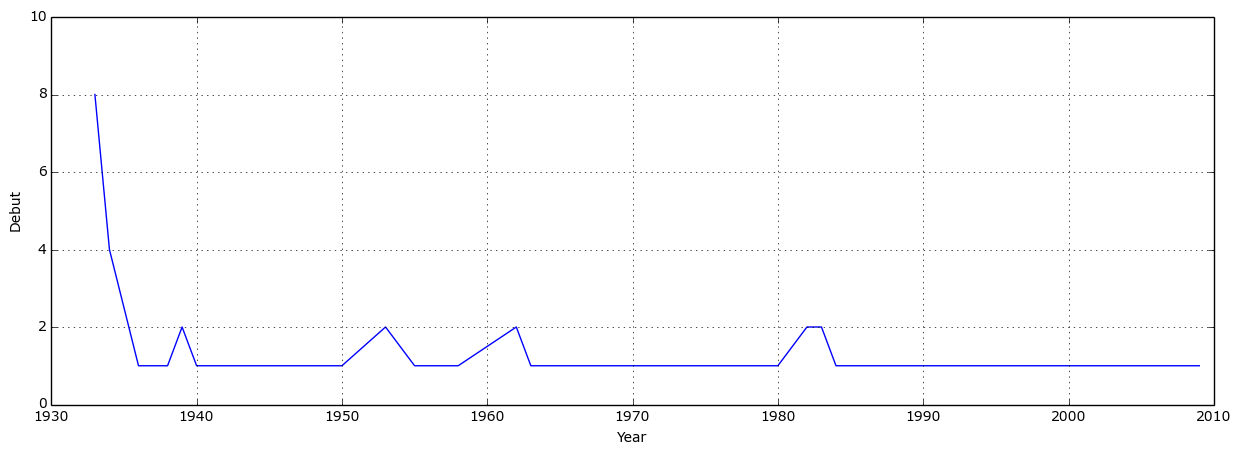

In [168]:
plt.figure(figsize=(15,5))
plt.plot(debut.index, debut.values)
plt.ylim([0,10])
plt.grid()
plt.xlabel("Year")
plt.ylabel("Debut")
plt.show();